# V - Merging esbae with CEO data 
### This script serves to merge validated data from CEO with eSBAE points for quick estimation of areas
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### combine all CEO sample files
##### add as many CEO files as there are projects

In [2]:
#DRC
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data_prov.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#GAB
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')

##### drop duplicates from ceo collections

In [3]:
ceo1_nodup = ceo1.drop_duplicates(subset='pl_point_id')
ceo2_nodup = ceo2.drop_duplicates(subset='pl_point_id')
#ceo3_nodup = ceo3.drop_duplicates(subset='pl_point_id')
#ceo4_nodup = ceo4.drop_duplicates(subset='pl_point_id')
#ceo5_nodup = ceo5.drop_duplicates(subset='pl_point_id')

In [4]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['OBJECTID', 'Join_Count', 'TARGET_FID', 'plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min

##### merge all ceo files

In [5]:
#make a list of the ceo files first
#ceo_files = [ceo1_nodup, ceo2_nodup, ceo3_nodup, ceo4_nodup, ceo5_nodup]
ceo_files = [ceo1_nodup, ceo2_nodup]

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
##### count the number of validated points per ceo file

In [6]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
    # Remove duplicates based on 'point_id' column
    ceo = ceo.drop_duplicates(subset='pl_point_id')
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of invalidated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)

# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'pl_strata', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Print the final merged DataFrame
print(len(merged_ceo))

ceo 1 # of validated points: 498, # of invalidated points: 0
ceo 2 # of validated points: 6590, # of invalidated points: 88
7176


In [7]:
merged_ceo['interpreted'].value_counts()

1    7088
0      88
Name: interpreted, dtype: int64

In [8]:
print(merged_ceo.dtypes)

plotid                                            int64
sampleid                                          int64
lon                                             float64
lat                                             float64
email                                            object
flagged                                          object
collection_time                                  object
analysis_duration                                object
sample_geom                                      object
pl_point_id                                       int64
pl_chg_prob                                     float64
pl_simple_combined                              float64
pl_strata                                         int64
forêt ou non-forêt en 2015?                      object
Y'a t'il de la régéneration                      object
Changement entre 2015-2022                       object
Type de Changement (2015-2022)                   object
Exploitation forestière artisanale (<5ha)       

In [9]:
# Rename columns to be same as esbae 
merged_ceo = merged_ceo.rename(columns={'pl_point_id': 'point_id'})
merged_ceo = merged_ceo.rename(columns={'pl_strata': 'stratum'})
merged_ceo = merged_ceo.rename(columns={'pl_chg_prob': 'chg_prob'})
merged_ceo = merged_ceo.rename(columns={'pl_simple_combined': 'simple_combined'})
#merged_ceo = merged_ceo.rename(columns={'pl_plotid_orig': 'plotid_orig'})

In [10]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]
len(merged_ceo_interpreted)

7088

In [11]:
merged_ceo_interpreted['stratum'].value_counts()

2    3599
3    3324
1     165
Name: stratum, dtype: int64

##### Check if values in 'pointid' are unique

In [12]:
# this might take some time
unique_check = merged_ceo_interpreted['point_id'].nunique() == len(merged_ceo_interpreted['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection)

In [13]:
# Find duplicate values in the 'ID' column
duplicate_ids = merged_ceo_interpreted[merged_ceo_interpreted.duplicated(subset='point_id', keep='first')]

# Print the duplicate rows including all columns
#print("Duplicate Rows:")
#print(duplicate_ids[['point_id', 'collection']])

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
len(duplicate_ids)

0

In [ ]:
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset=['point_id'])
len(merged_ceo_nodup)

In [ ]:
merged_ceo_nodup.head()

In [ ]:
merged_ceo_interpreted = merged_ceo_nudup

#### read all esbae points with augmented data (output from script 5)

In [14]:
# Read the CSV files
#DRC
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_2015_2022_model.csv')
#GAB
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_2015_2022_model.csv')
len(esbae)

1548365

In [15]:
#DRC
esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined','NOM']]
#GAB
#esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined']]

In [16]:
esbae.columns

Index(['point_id', 'PLOTID', 'LAT', 'LON', 'stratum', 'chg_prob',
       'simple_combined', 'NOM'],
      dtype='object')

##### Rename columns to be same as ceo file 

In [17]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})
esbae['interpreted']=0

In [18]:
print(esbae.dtypes)

point_id             int64
plotid               int64
lat                float64
lon                float64
stratum              int64
chg_prob           float64
simple_combined    float64
NOM                 object
interpreted          int64
dtype: object


In [19]:
len(esbae)

1548365

### Merge ceo and sbae tables
#### replace validated points in esbae points

In [35]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_interpreted['point_id'].tolist()
len(validated_id_list)

7088

In [39]:
# Remove validated points from esbae
# Remove rows from 'esbae' where 'point_id' is in 'merged_ceo'
esbae_not_interpreted = esbae[~esbae['point_id'].isin(validated_id_list)]
len(esbae_not_interpreted)

1543020

In [40]:
# Merge the DataFrames based on 'point_id'
merged_df = esbae_not_interpreted.merge(merged_ceo_interpreted, on='point_id', how='inner')

# Get the count of matching rows
matching_rows_count = len(merged_df)

# Print the count of matching rows
print(f'Number of matching rows: {matching_rows_count}')

Number of matching rows: 0


In [ ]:
#append esbae and ceo

In [41]:
# Append 'ceo' to 'esbae' keeping all columns from 'ceo' and merging common columns
esbae_ceo = pd.concat([esbae_not_interpreted, merged_ceo_interpreted], axis=0, ignore_index=True)

# Print the resulting DataFrame
len(esbae_ceo)

1550108

In [42]:
esbae_ceo.columns

Index(['point_id', 'plotid', 'lat', 'lon', 'stratum', 'chg_prob',
       'simple_combined', 'NOM', 'interpreted', 'sampleid', 'email', 'flagged',
       'collection_time', 'analysis_duration', 'sample_geom',
       'forêt ou non-forêt en 2015?', 'Y'a t'il de la régéneration',
       'Changement entre 2015-2022', 'Type de Changement (2015-2022)',
       'Exploitation forestière artisanale (<5ha)',
       'Activité minière artisanale', 'Infrastructure routière',
       'Infrastructure d’urbanisation ou habitations',
       'Exploitation forestière industrielle (>5ha)', 'Autre moteur',
       'Descriptif autre moteur', 'Activité minière industrielle',
       'Agriculture industrielle', 'Agriculture paysanne',
       'Année de Changement', 'Type de non-forêt en 2015',
       'Type de forêt en 2015', 'Commentaires', 'collection'],
      dtype='object')

In [43]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
# Change the data type of 'FloatColumn' to integer
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts()

0    1543020
1       7088
Name: interpreted, dtype: int64

## add new columns for change and year

#### clean up columns and replace values

In [44]:
def f(x):
  if x['Type de Changement (2015-2022)'] == 'déforestation': return 'Def'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' : return 'Deg'
  elif x['forêt ou non-forêt en 2015?'] == 'non-forêt' : return 'NF'
  elif x['Changement entre 2015-2022'] == 'non' : return 'Stable'
  else: return ''

esbae_ceo['ChangeType'] = esbae_ceo.apply(f, axis=1)
esbae_ceo['ChangeType'].value_counts()

          1543020
NF           4025
Stable       2479
Def           429
Deg           155
Name: ChangeType, dtype: int64

In [45]:
def y(x):
  if x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2016: return 'Def2016'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2017: return 'Def2017'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2018: return 'Def2018'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2019: return 'Def2019'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2020: return 'Def2020'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2021: return 'Def2021'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2022: return 'Def2022'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2016: return 'Deg2016'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2017: return 'Deg2017'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2018: return 'Deg2018'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2019: return 'Deg2019'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2020: return 'Deg2020'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2021: return 'Deg2021'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2022: return 'Deg2022'
  elif x['forêt ou non-forêt en 2015?'] == 'non-forêt' : return 'NF'
  elif x['Changement entre 2015-2022'] == 'non' : return 'Stable'
  else: return ''

esbae_ceo['ChangeYear'] = esbae_ceo.apply(y, axis=1)

annual_counts = esbae_ceo['ChangeYear'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

           1543020
Def2016         52
Def2017         63
Def2018         58
Def2019         79
Def2020         78
Def2021         57
Def2022         42
Deg2016         51
Deg2017         11
Deg2018         14
Deg2019         26
Deg2020         23
Deg2021         16
Deg2022         14
NF            4025
Stable        2479
Name: ChangeYear, dtype: int64


In [46]:
annual_counts.sum()

1550108

##### plot deforestation points by year

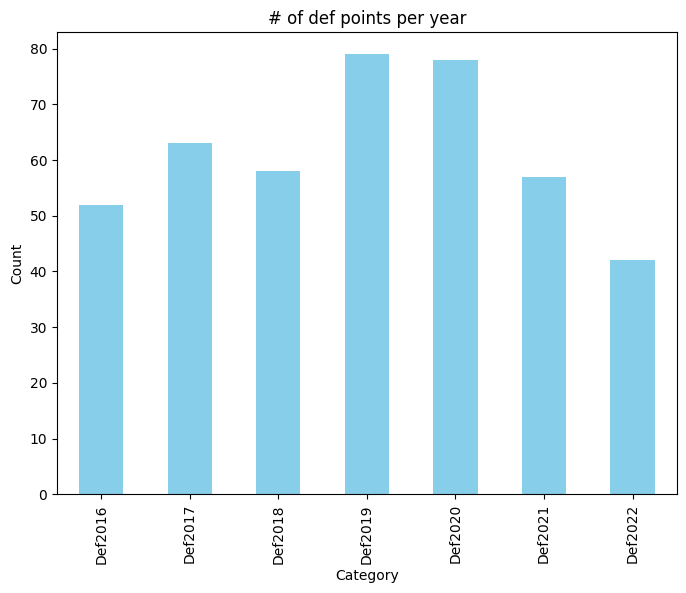

In [47]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['ChangeYear'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['ChangeYear'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

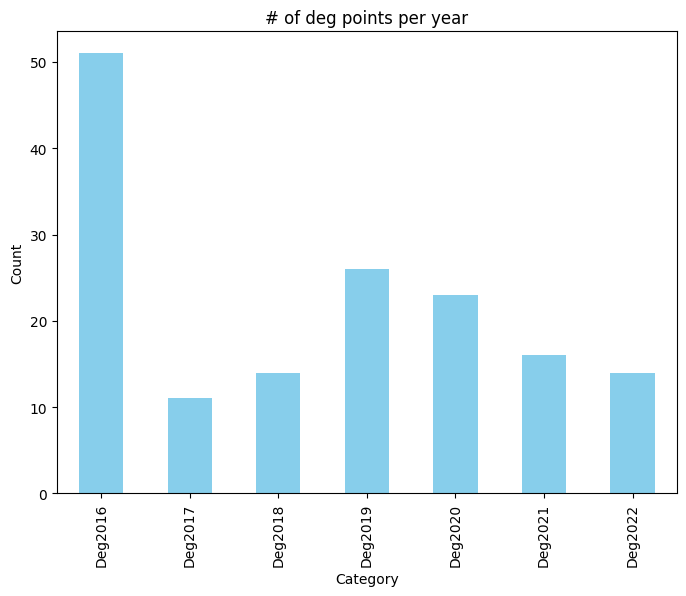

In [48]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['ChangeYear'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['ChangeYear'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [49]:
esbae_ceo.head()

,point_id,plotid,lat,lon,stratum,chg_prob,simple_combined,NOM,interpreted,sampleid,email,flagged,collection_time,analysis_duration,sample_geom,forêt ou non-forêt en 2015?,Y'a t'il de la régéneration,Changement entre 2015-2022,Type de Changement (2015-2022),Exploitation forestière artisanale (<5ha),Activité minière artisanale,Infrastructure routière,Infrastructure d’urbanisation ou habitations,Exploitation forestière industrielle (>5ha),Autre moteur,Descriptif autre moteur,Activité minière industrielle,Agriculture industrielle,Agriculture paysanne,Année de Changement,Type de non-forêt en 2015,Type de forêt en 2015,Commentaires,collection,ChangeType,ChangeYear
0,1786794,1786794,3.176039,21.814596,1,0.037333,0.037333,Nord-Ubangi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
1,1786795,1786795,3.185814,21.819697,1,0.061333,0.061333,Nord-Ubangi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,1786824,1786824,3.156549,21.814248,1,0.019333,0.019333,Nord-Ubangi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,1786825,1786825,3.166323,21.819349,1,0.019333,0.019333,Nord-Ubangi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,1786858,1786858,3.146832,21.818997,1,0.003333,0.003333,Nord-Ubangi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [50]:
print(esbae_ceo.columns.values)

['point_id' 'plotid' 'lat' 'lon' 'stratum' 'chg_prob' 'simple_combined'
 'NOM' 'interpreted' 'sampleid' 'email' 'flagged' 'collection_time'
 'analysis_duration' 'sample_geom' 'forêt ou non-forêt en 2015?'
 "Y'a t'il de la régéneration" 'Changement entre 2015-2022'
 'Type de Changement (2015-2022)'
 'Exploitation forestière artisanale (<5ha)' 'Activité minière artisanale'
 'Infrastructure routière' 'Infrastructure d’urbanisation ou habitations'
 'Exploitation forestière industrielle (>5ha)' 'Autre moteur'
 'Descriptif autre moteur' 'Activité minière industrielle'
 'Agriculture industrielle' 'Agriculture paysanne' 'Année de Changement'
 'Type de non-forêt en 2015' 'Type de forêt en 2015' 'Commentaires'
 'collection' 'ChangeType' 'ChangeYear']


In [51]:
merged_annual_counts = esbae_ceo['ChangeYear'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

           1543020
Def2016         52
Def2017         63
Def2018         58
Def2019         79
Def2020         78
Def2021         57
Def2022         42
Deg2016         51
Deg2017         11
Deg2018         14
Deg2019         26
Deg2020         23
Deg2021         16
Deg2022         14
NF            4025
Stable        2479
Name: ChangeYear, dtype: int64

In [52]:
esbae_ceo.describe()

,point_id,plotid,lat,lon,stratum,chg_prob,simple_combined,interpreted,sampleid,Année de Changement,collection
count,1.550108e+06,1.550108e+06,1.550108e+06,1.550108e+06,1.550108e+06,1.550108e+06,1.550108e+06,1.550108e+06,7.088000e+03,584.000000,7088.000000
mean,2.381185e+06,2.370334e+06,-2.268749e+00,2.380624e+01,1.569431e+00,2.061268e-01,2.061268e-01,4.572585e-03,1.730111e+05,2018.804795,1.929740
std,6.051904e+05,6.229701e+05,4.362063e+00,3.687418e+00,6.891414e-01,2.039397e-01,2.039397e-01,6.746613e-02,6.414379e+05,1.929169,0.255602
min,6.962910e+05,1.000000e+00,-1.344702e+01,1.220922e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2016.000000,1.000000
25%,1.905853e+06,1.900666e+06,-5.305861e+00,2.102890e+01,1.000000e+00,2.733333e-02,2.733333e-02,0.000000e+00,1.772750e+03,2017.000000,2.000000
50%,2.392792e+06,2.387496e+06,-1.817632e+00,2.403334e+01,1.000000e+00,1.360000e-01,1.360000e-01,0.000000e+00,3.544500e+03,2019.000000,2.000000
75%,2.886930e+06,2.879428e+06,1.331850e+00,2.690447e+01,2.000000e+00,3.446667e-01,3.446667e-01,0.000000e+00,5.316250e+03,2020.000000,2.000000
max,3.430050e+06,3.430050e+06,5.384708e+00,3.124918e+01,3.000000e+00,9.853333e-01,9.853333e-01,1.000000e+00,3.429214e+06,2022.000000,2.000000


In [53]:
print(esbae_ceo.dtypes)

point_id                                          int64
plotid                                            int64
lat                                             float64
lon                                             float64
stratum                                           int64
chg_prob                                        float64
simple_combined                                 float64
NOM                                              object
interpreted                                       int64
sampleid                                        float64
email                                            object
flagged                                          object
collection_time                                  object
analysis_duration                                object
sample_geom                                      object
forêt ou non-forêt en 2015?                      object
Y'a t'il de la régéneration                      object
Changement entre 2015-2022                      

In [56]:
esbae_ceo_columns = ['point_id' 'plotid' 'lat' 'lon' 'stratum' 'chg_prob' 'simple_combined'
 'NOM' 'interpreted' 'sampleid' 'email' 'flagged' 'collection_time'
 'analysis_duration' 'sample_geom' 'forêt ou non-forêt en 2015?'
 "Y'a t'il de la régéneration" 'Changement entre 2015-2022'
 'Type de Changement (2015-2022)'
 'Exploitation forestière artisanale (<5ha)' 'Activité minière artisanale'
 'Infrastructure routière' 'Infrastructure d’urbanisation ou habitations'
 'Exploitation forestière industrielle (>5ha)' 'Autre moteur'
 'Descriptif autre moteur' 'Activité minière industrielle'
 'Agriculture industrielle' 'Agriculture paysanne' 'Année de Changement'
 'Type de non-forêt en 2015' 'Type de forêt en 2015' 'Commentaires'
 'collection' 'ChangeType' 'ChangeYear']

In [57]:
len(esbae_ceo)

1550108

##### export merged esbae and ceo data to one csv file for next step

In [58]:
data_out =  '/home/sepal-user/module_results/esbae/DRC/DRC_esbae_ceo_merge.csv'
esbae_ceo.to_csv(data_out,index=True)

#### now move on to calculation of areas - script 6b